<a href="https://colab.research.google.com/github/aayush1036/algorithm_trading_course/blob/master/Stock_analysis_with_seaborn_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


```
Prepared by:
Sahira Sheikh
```






This is a python notebook intended to help you with basic stock analysis along with the visulalizations.

Precautions and advices

1) This notebook uses Yahoo Finance as it's source of financial data by default, if you intend to use a different source then please edit the 
argument 'source' of the DataReader function 

2) The case in which you enter the stock does not matter as the stock name will be converted to upper case 

3) The separator you use while entering the dates does not matter as the date accepts both separators like '/' and '-' but please enter the date in YYYY/MM/DD format





Imports

In [ ]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
from pandas_datareader import data
from pandas_datareader.data import DataReader
from datetime import datetime
from scipy import stats
import statistics
import matplotlib.pyplot as plt

User inputs

In [ ]:
print('Enter quit to stop')
stock_list = list()
while True:
  stock = input('Enter a stock name according to yahoo finance search: ')
  if stock.upper().startswith('QUIT'):
    break
  else:
    stock_list.append(stock.upper())
from_date = input('Enter the from date in yyyy/mm/dd format ')
from_date = re.split('-|/', from_date)
to_date = input('Enter the to date in yyyy/mm/dd format ')
to_date = re.split('-|/', to_date)
for i in range(len(from_date)):
  from_date[i] = int(from_date[i])
for j in range(len(to_date)):
  to_date[j] = int(to_date[j])

Enter quit to stop
Enter a stock name according to yahoo finance search: aapl
Enter a stock name according to yahoo finance search: msft
Enter a stock name according to yahoo finance search: goog
Enter a stock name according to yahoo finance search: fb
Enter a stock name according to yahoo finance search: baba
Enter a stock name according to yahoo finance search: tsla
Enter a stock name according to yahoo finance search: nvda
Enter a stock name according to yahoo finance search: crm
Enter a stock name according to yahoo finance search: quit
Enter the from date in yyyy/mm/dd format 2020/01/01
Enter the to date in yyyy/mm/dd format 2020/09/14


In [ ]:
column_name = input('Enter the column you would like to consider for analysis (case sensitive): ')
final_dataframe = pd.DataFrame()
try:
  for stock in stock_list:
    historical_data = DataReader(stock,  "yahoo", datetime(from_date[0], from_date[1], from_date[2]), datetime(to_date[0], to_date[1], to_date[2]))
    final_dataframe[stock] = historical_data[column_name]
except:
  print('Please enter a valid input')

Enter the column you would like to consider for analysis (case sensitive): Adj Close


Calculating Returns

In [ ]:
return_dataframe = final_dataframe.pct_change()
return_dataframe = return_dataframe.dropna()
return_dataframe.columns = stock_list

Histogram

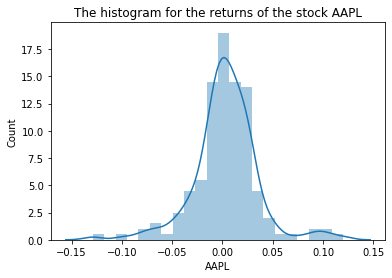

The histogram shows that the returns of AAPL oscillate around [-0.12864692]
The average return of this stock is 0.0031064224574367865
The median return of this stock is 0.0035695940282025607
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


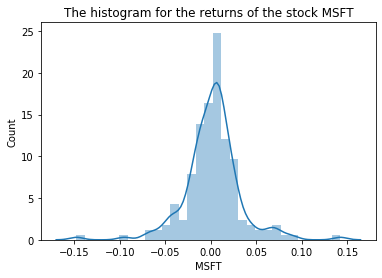

The histogram shows that the returns of MSFT oscillate around [-0.14739027]
The average return of this stock is 0.0020255321733392007
The median return of this stock is 0.0034612616525111495
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


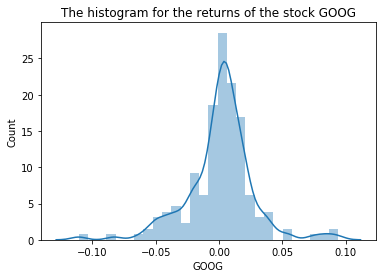

The histogram shows that the returns of GOOG oscillate around [-0.1110082]
The average return of this stock is 0.0010730154915345098
The median return of this stock is 0.004178791956415795
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


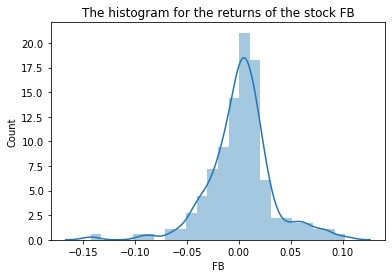

The histogram shows that the returns of FB oscillate around [-0.14252998]
The average return of this stock is 0.0019498240203535697
The median return of this stock is 0.002729945887073093
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


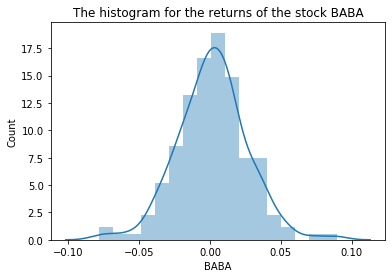

The histogram shows that the returns of BABA oscillate around [-0.07809275]
The average return of this stock is 0.0017539016879446045
The median return of this stock is 0.0017001107792407044
This stock is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan
Please look out for the outliers also


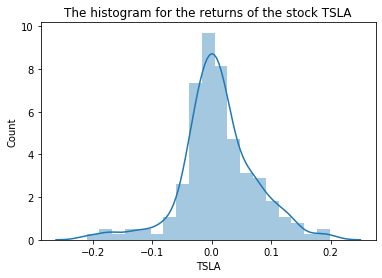

The histogram shows that the returns of TSLA oscillate around [-0.21062826]
The average return of this stock is 0.011097519575996544
The median return of this stock is 0.005351966203106517
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


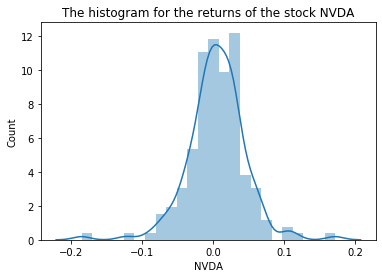

The histogram shows that the returns of NVDA oscillate around [-0.18452088]
The average return of this stock is 0.005266379300175634
The median return of this stock is 0.004915283385293456
This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock
This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan
Please look out for the outliers also


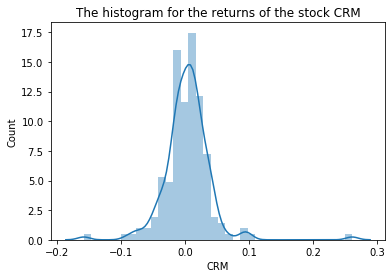

The histogram shows that the returns of CRM oscillate around [-0.1588848]
The average return of this stock is 0.0030184915083067906
The median return of this stock is 0.0033407061488670564
This stock is positively skewed which indicates that there are more positive returns which is a good sign for the stock
This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan
Please look out for the outliers also


In [ ]:
for stock in stock_list:
  title = 'The histogram for the returns of the stock {stock}'.format(stock = stock)
  sns.distplot(return_dataframe[stock]).set_title(title)
  plt.ylabel('Count')
  plt.show()
  print('The histogram shows that the returns of', stock, 'oscillate around', stats.mode(return_dataframe[stock])[0])
  print('The average return of this stock is', np.mean(return_dataframe[stock]))
  print('The median return of this stock is', np.median(return_dataframe[stock]))
  if return_dataframe[stock].skew()>0:
    print('This stock is positively skewed which indicates that there are more positive returns which is a good sign for the stock')
    print('This is supported by the more number of peaks and higher peaks on the positive side of the histogram after the meidan')
  elif return_dataframe[stock].skew()<0:
    print('This stock is negatively skewed which indicates that there are more negative returns which is a bad sign for the stock')
    print('This is supported by the more number of peaks and higher peaks on the negative side of the histogram before the meidan')
  else:
    print('The stock is not skewed which means both the returns are equally likely')
  print('Please look out for the outliers also')

Boxplots

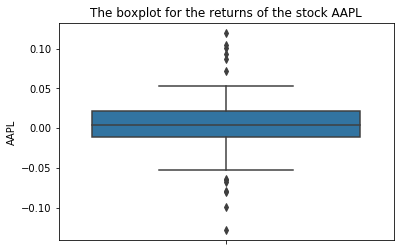

From this boxplot we can see that the median retruns of this stock AAPL is  0.0035695940282025607
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


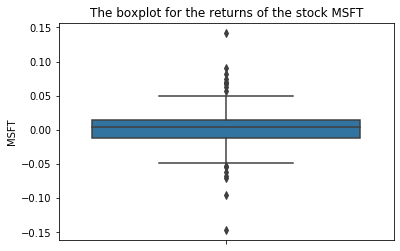

From this boxplot we can see that the median retruns of this stock MSFT is  0.0034612616525111495
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


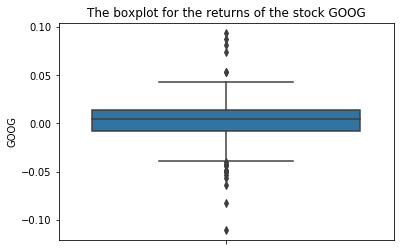

From this boxplot we can see that the median retruns of this stock GOOG is  0.004178791956415795
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


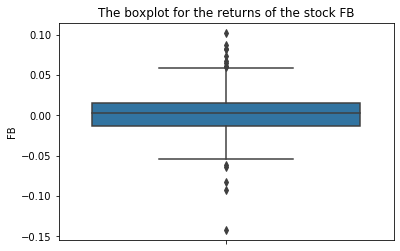

From this boxplot we can see that the median retruns of this stock FB is  0.002729945887073093
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


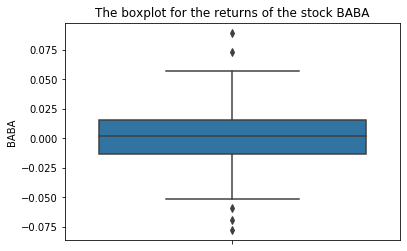

From this boxplot we can see that the median retruns of this stock BABA is  0.0017001107792407044
From this boxplot we can see that there are more positive returns in this stock
This can be seen in the boxplot as there are more returns above the median i.e there is more data above the median than below the median
Please watch out for the outliers


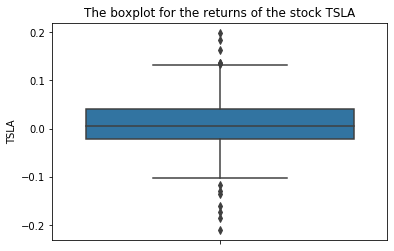

From this boxplot we can see that the median retruns of this stock TSLA is  0.005351966203106517
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


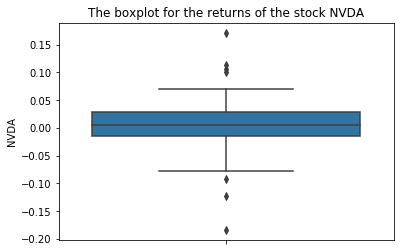

From this boxplot we can see that the median retruns of this stock NVDA is  0.004915283385293456
From this boxplot we can see that there are more negative returns in this stock
This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median
Please watch out for the outliers


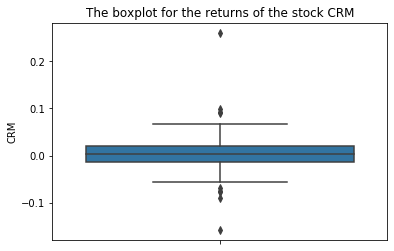

From this boxplot we can see that the median retruns of this stock CRM is  0.0033407061488670564
From this boxplot we can see that there are more positive returns in this stock
This can be seen in the boxplot as there are more returns above the median i.e there is more data above the median than below the median
Please watch out for the outliers


In [ ]:
for stock in stock_list:
  title = 'The boxplot for the returns of the stock {stock}'.format(stock = stock)
  sns.boxplot(y=return_dataframe[stock]).set_title(title)
  plt.show()
  print('From this boxplot we can see that the median retruns of this stock', stock, 'is ', np.median(return_dataframe[stock]))
  if return_dataframe[stock].skew()>0:
    print('From this boxplot we can see that there are more positive returns in this stock')
    print('This can be seen in the boxplot as there are more returns above the median i.e there is more data above the median than below the median')
  elif return_dataframe[stock].skew()<0:
    print('From this boxplot we can see that there are more negative returns in this stock')
    print('This can be seen in the boxplot as there are more returns below the median i.e there is more data below the median than above the median')
  else:
    print('The returns are not skewed and the positive returns and the negative returns are equally likely')
  print('Please watch out for the outliers')

Time Series Plots

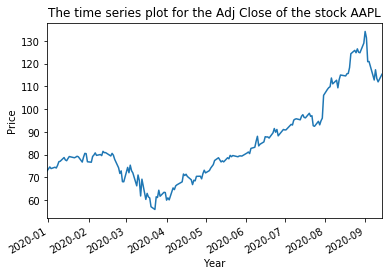

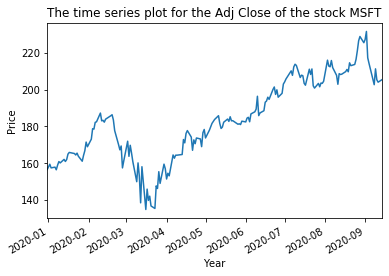

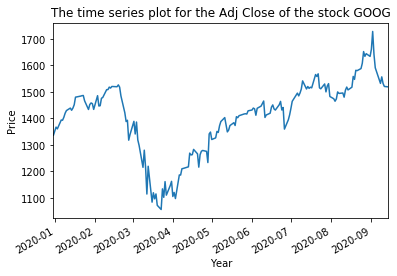

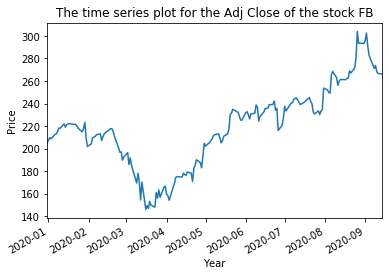

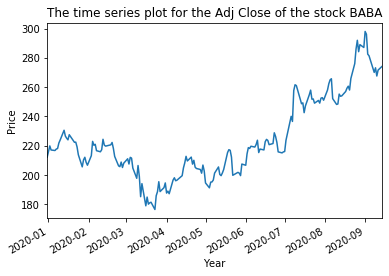

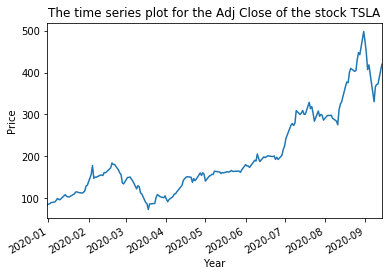

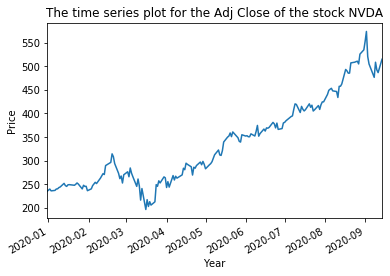

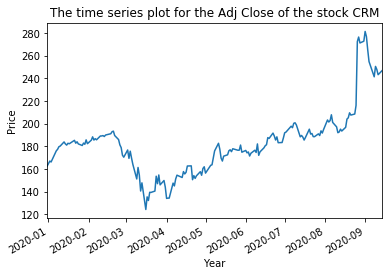

In [ ]:
for stock in stock_list:
  final_dataframe[stock].plot()
  title = 'The time series plot for the {column} of the stock {stock}'.format(column = column_name, stock = stock)
  plt.xlabel('Year');
  plt.ylabel('Price')
  plt.title(title)
  plt.show()

Descriptive Statistics

In [ ]:
print('Mean returns:')
np.mean(return_dataframe)

Mean returns:


AAPL    0.003106
MSFT    0.002026
GOOG    0.001073
FB      0.001950
BABA    0.001754
TSLA    0.011098
NVDA    0.005266
CRM     0.003018
dtype: float64

In [ ]:
print('Median Returns')
for stock in stock_list:
  print(stock, np.median(return_dataframe[stock]))

Median Returns
AAPL 0.0035695940282025607
MSFT 0.0034612616525111495
GOOG 0.004178791956415795
FB 0.002729945887073093
BABA 0.0017001107792407044
TSLA 0.005351966203106517
NVDA 0.004915283385293456
CRM 0.0033407061488670564


In [ ]:
print('Mode Returns: ')
for stock in stock_list:
  print(stock, stats.mode(return_dataframe[stock])[0])

Mode Returns: 
AAPL [-0.12864692]
MSFT [-0.14739027]
GOOG [-0.1110082]
FB [-0.14252998]
BABA [-0.07809275]
TSLA [-0.21062826]
NVDA [-0.18452088]
CRM [-0.1588848]


In [ ]:
print('Skewness')
for stock in stock_list:
  print(stock, return_dataframe[stock].skew())

Skewness
AAPL -0.08747231601926383
MSFT -0.0734316355415436
GOOG -0.22597197188797374
FB -0.30398437350684077
BABA 0.05018894844069672
TSLA -0.20160237615765408
NVDA -0.2957830931551721
CRM 1.4114424261247343


In [ ]:
print('Correlation Matirix')
return_dataframe.corr()

Correlation Matirix


,AAPL,MSFT,GOOG,FB,BABA,TSLA,NVDA,CRM
AAPL,1.000000,0.862247,0.795135,0.789321,0.651901,0.504225,0.795357,0.656988
MSFT,0.862247,1.000000,0.872416,0.778216,0.669986,0.530858,0.854250,0.736709
GOOG,0.795135,0.872416,1.000000,0.824931,0.639387,0.497357,0.799216,0.713733
FB,0.789321,0.778216,0.824931,1.000000,0.561894,0.418874,0.707468,0.725478
BABA,0.651901,0.669986,0.639387,0.561894,1.000000,0.458475,0.658923,0.533271
TSLA,0.504225,0.530858,0.497357,0.418874,0.458475,1.000000,0.534303,0.507303
NVDA,0.795357,0.854250,0.799216,0.707468,0.658923,0.534303,1.000000,0.660488
CRM,0.656988,0.736709,0.713733,0.725478,0.533271,0.507303,0.660488,1.000000


In [ ]:
print('Standard Deviation can be used as a measure of volatility')
for stock in stock_list:
  print(stock, np.std(return_dataframe[stock]))

Standard Deviation can be used as a measure of volatility
AAPL 0.03193258411115494
MSFT 0.03113617764526671
GOOG 0.026421758428249714
FB 0.03089816017385857
BABA 0.024678724517141367
TSLA 0.06220438589270033
NVDA 0.04045130976401643
CRM 0.0369289782583631


In [ ]:
covMatrix = pd.DataFrame.cov(return_dataframe)
covMatrix

,AAPL,MSFT,GOOG,FB,BABA,TSLA,NVDA,CRM
AAPL,0.001025,0.000862,0.000675,0.000783,0.000517,0.001007,0.001033,0.000779
MSFT,0.000862,0.000975,0.000722,0.000753,0.000518,0.001034,0.001082,0.000852
GOOG,0.000675,0.000722,0.000702,0.000677,0.000419,0.000822,0.000859,0.000700
FB,0.000783,0.000753,0.000677,0.000960,0.000431,0.000810,0.000889,0.000833
BABA,0.000517,0.000518,0.000419,0.000431,0.000612,0.000708,0.000662,0.000489
TSLA,0.001007,0.001034,0.000822,0.000810,0.000708,0.003891,0.001352,0.001172
NVDA,0.001033,0.001082,0.000859,0.000889,0.000662,0.001352,0.001646,0.000992
CRM,0.000779,0.000852,0.000700,0.000833,0.000489,0.001172,0.000992,0.001371


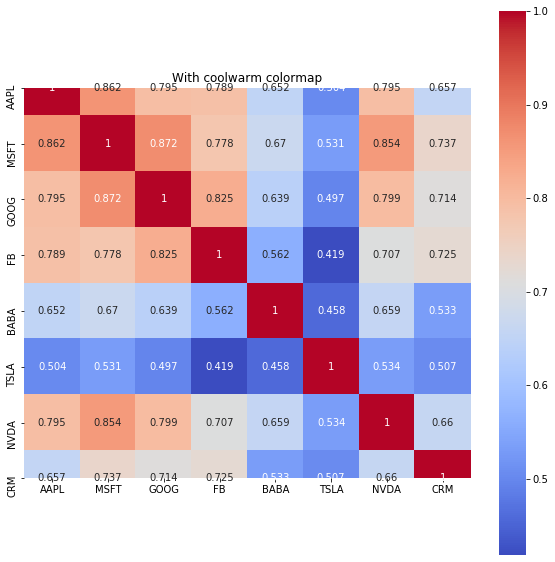

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(return_dataframe.corr(), annot=True, fmt ='.3g', cmap='coolwarm', square=True).set_title('With coolwarm colormap')
plt.show()

# we can add colormaps as cmap = 'a_random_colormap_from_the_documentataion' to make it more presentable
#or we can use as_cmap=True for a color pallete

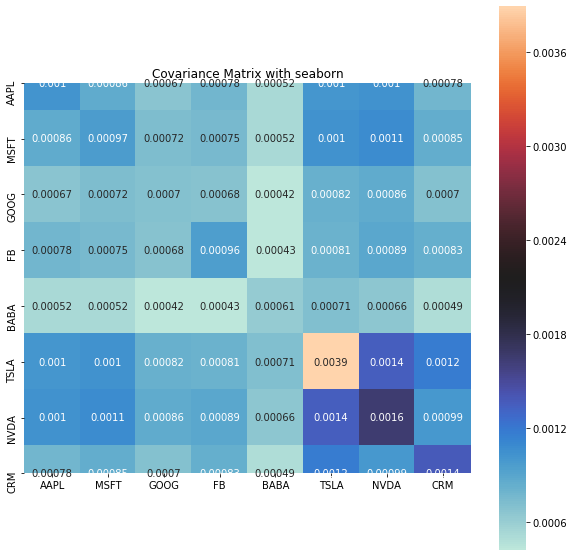

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(covMatrix, annot=True, cmap='icefire', square=True).set_title('Covariance Matrix with seaborn')
plt.show()
#Maybe that is not pretty, but wiil improve if we have more variables 

We can try some plots from this link if they suit our project

https://medium.com/@madhuramiah/some-interesting-visualizations-with-seaborn-python-ad207f50b844

Pairplot

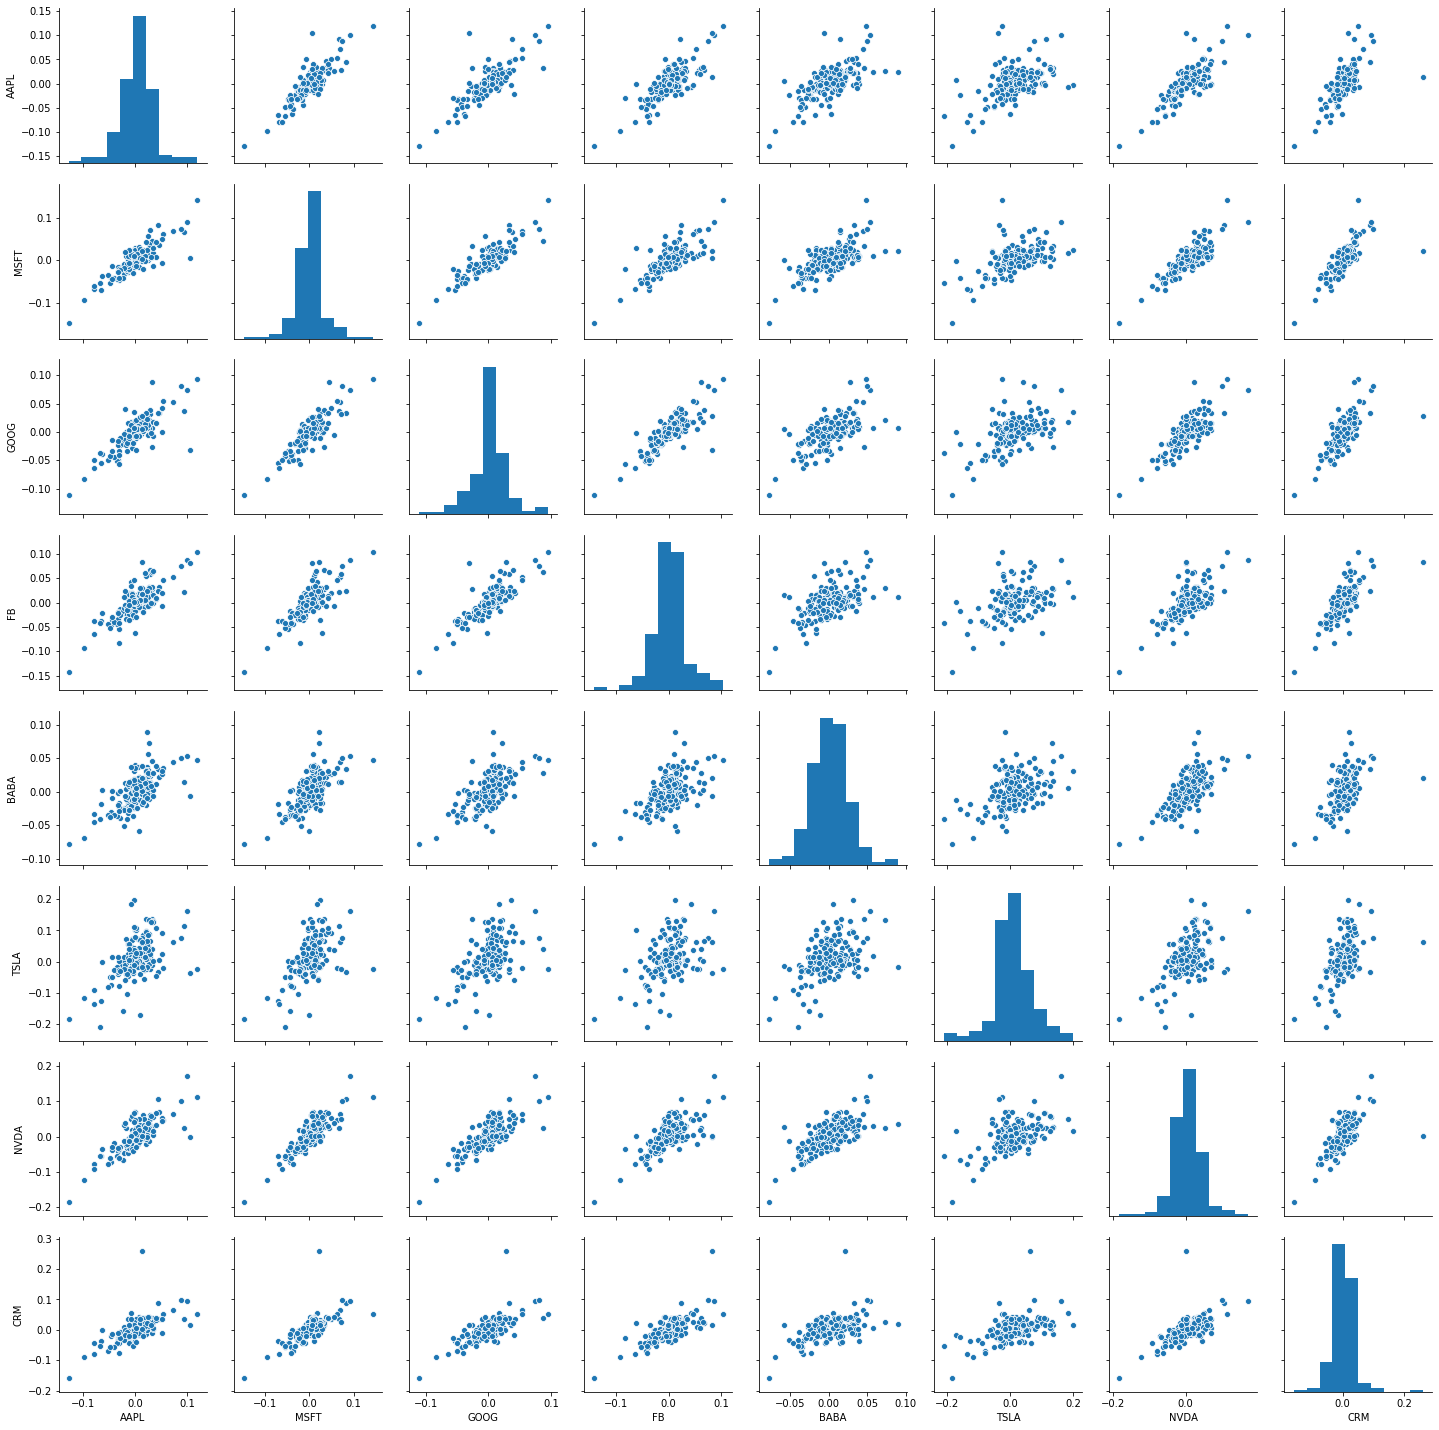

In [ ]:
sns.pairplot(return_dataframe)

Boxen plot

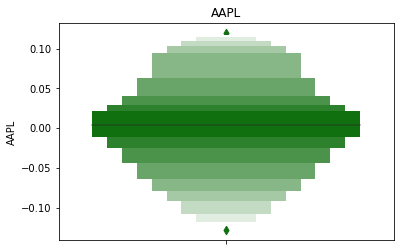

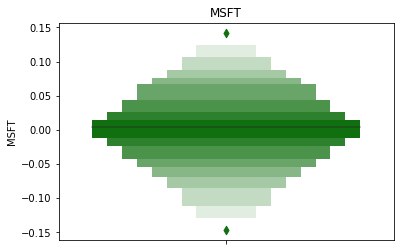

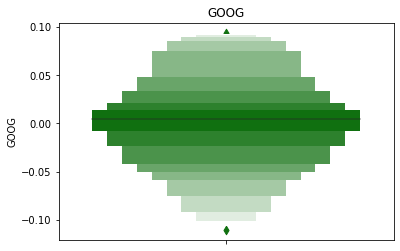

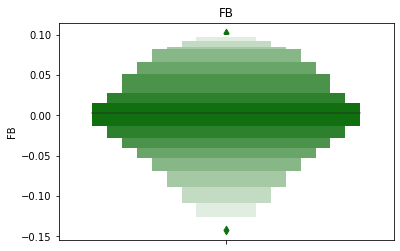

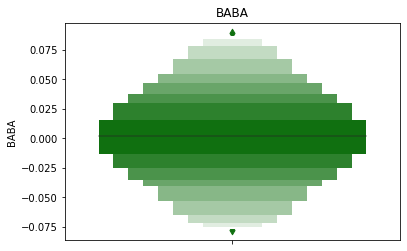

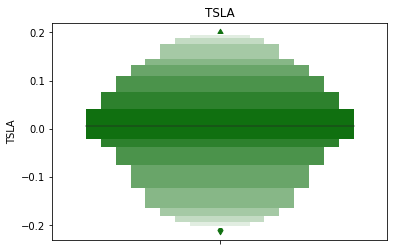

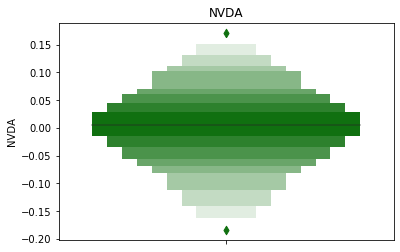

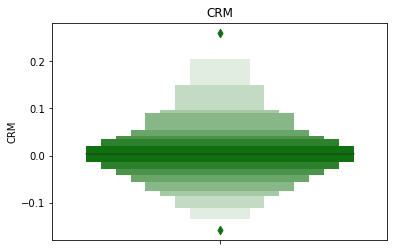

In [ ]:
for stock in stock_list:
  sns.boxenplot(y=stock, color="g", scale="linear", data=return_dataframe).set_title(stock)
  plt.show()

Swarm plot

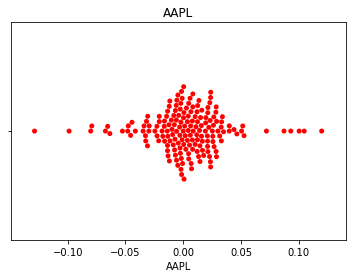

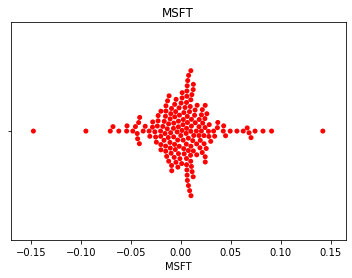

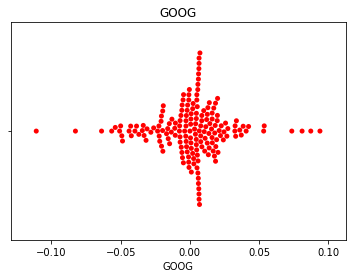

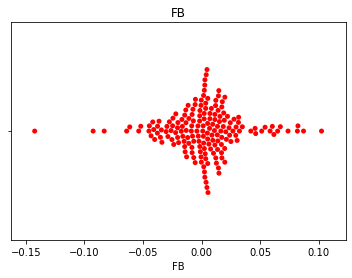

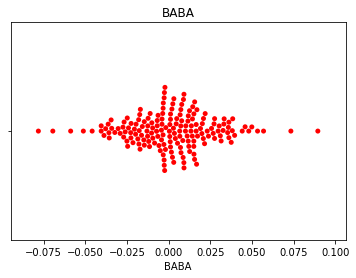

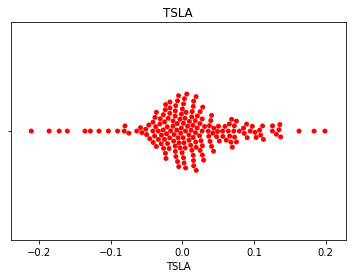

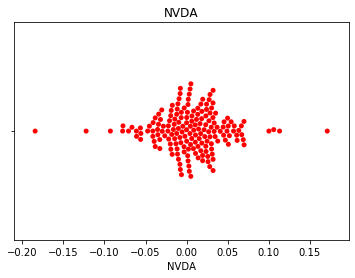

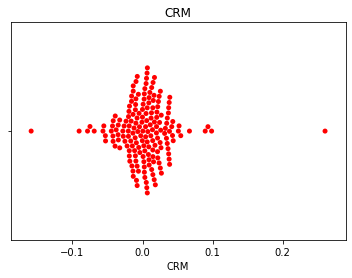

In [ ]:
for stock in stock_list:
  sns.swarmplot(x=stock,palette=["r", "c", "y"], data=return_dataframe).set_title(stock)
  plt.show()

We can add trendlines also 

https://seaborn.pydata.org/generated/seaborn.regplot.html

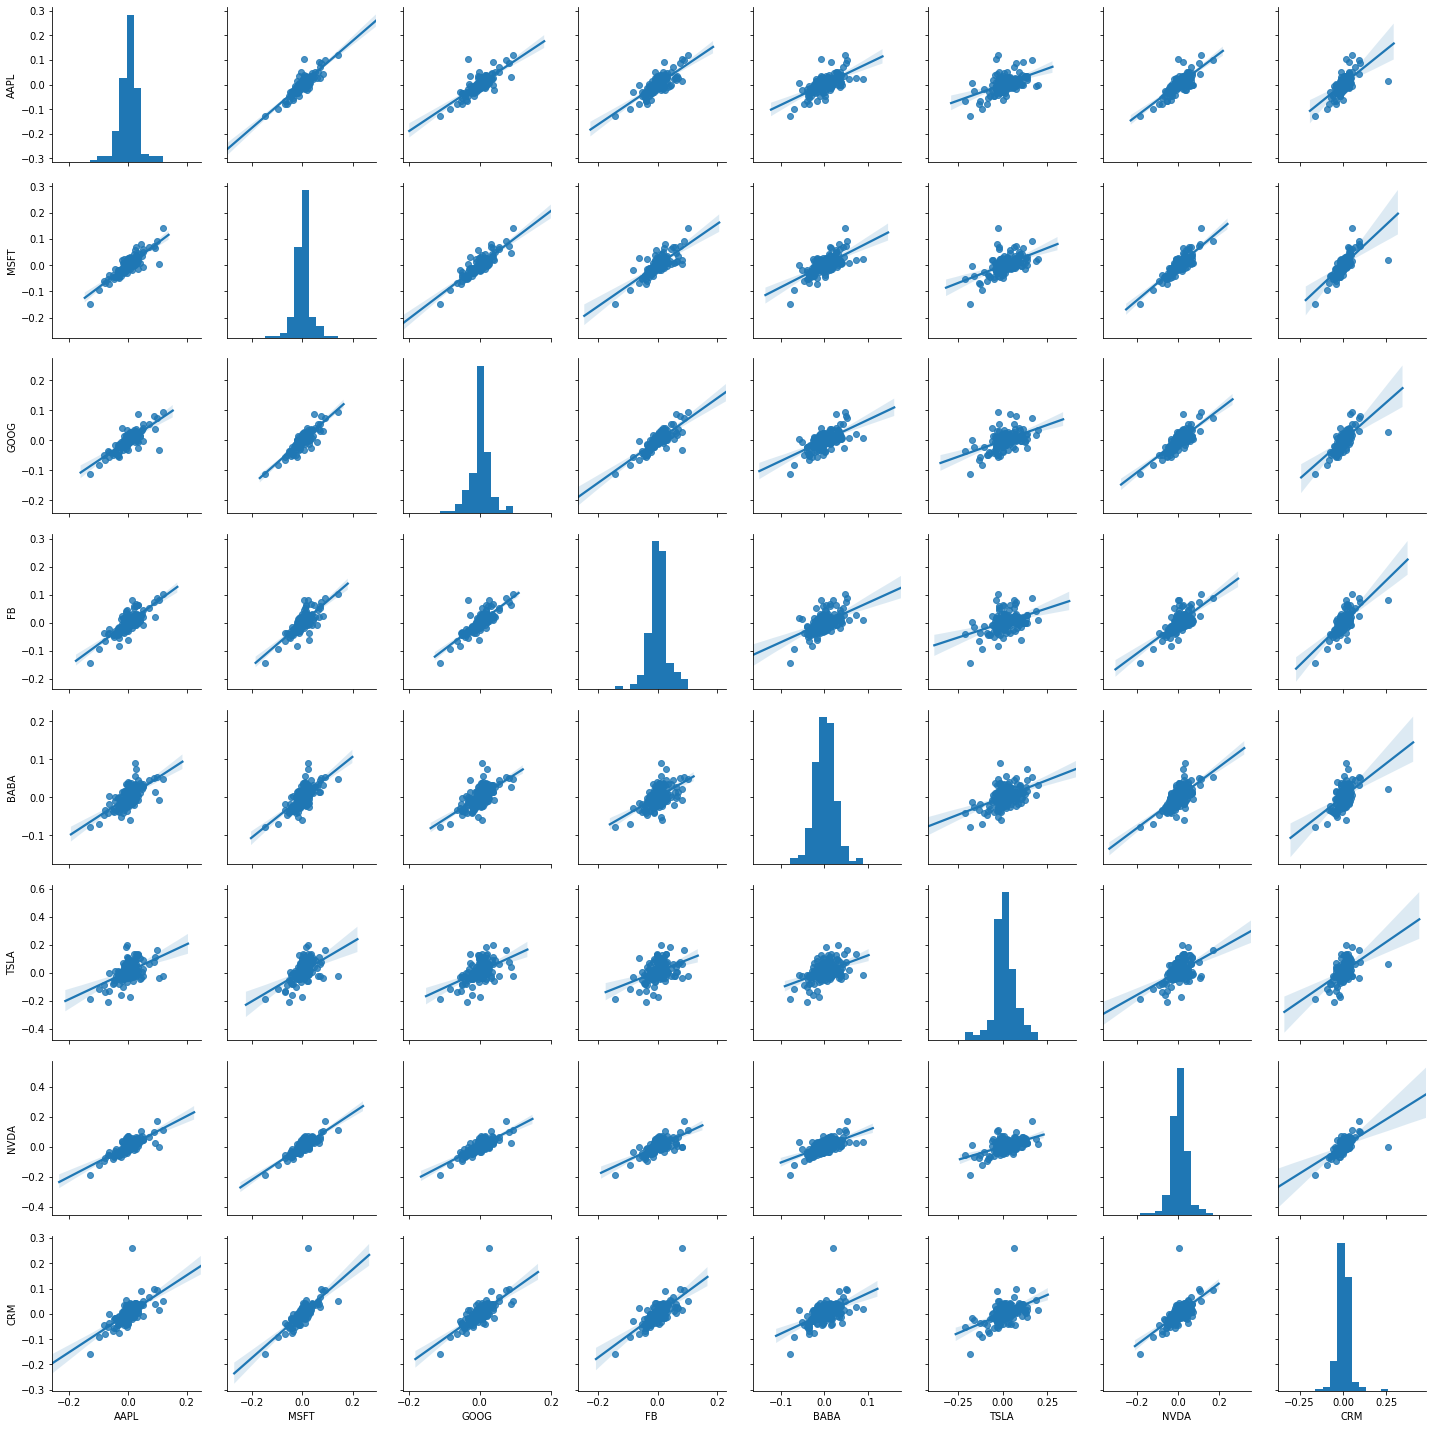

In [ ]:
sns.pairplot(return_dataframe, kind='reg')
plt.show()
#Trendlines is a good way to indicate correlation 

Predictions

In [ ]:
prediction_df = pd.DataFrame()
value_list = list()
for stock in stock_list:
  first_high = np.mean(final_dataframe[stock]) + np.std(final_dataframe[stock])
  first_low = np.mean(final_dataframe[stock]) - np.std(final_dataframe[stock])
  second_high = np.mean(final_dataframe[stock]) + 2*(np.std(final_dataframe[stock]))
  second_low = np.mean(final_dataframe[stock]) - 2*(np.std(final_dataframe[stock]))
  third_high = np.mean(final_dataframe[stock]) + 3*(np.std(final_dataframe[stock]))
  third_low = np.mean(final_dataframe[stock]) - 3*(np.std(final_dataframe[stock]))
  value_list = [first_high, first_low, second_high, second_low, third_high, third_low]
  prediction_df[stock] = value_list
row_list = ['First High', 'First Low', 'Second High', 'Second Low', 'Third High', 'Third Low']
prediction_df.index = row_list
print('The first high/low represents 68% surety')
print('The second high/low represents 95% surety')
print('The third high/low represents 99% surety')
prediction_df

The first high/low represents 68% surety
The second high/low represents 95% surety
The third high/low represents 99% surety


,AAPL,MSFT,GOOG,FB,BABA,TSLA,NVDA,CRM
First High,102.801504,205.500783,1544.330393,253.812525,251.135662,299.632961,427.058194,211.121650
First Low,67.031928,161.196890,1270.708756,183.508375,196.283327,100.508206,246.221533,153.751047
Second High,120.686293,227.652729,1681.141212,288.964600,278.561830,399.195339,517.476525,239.806952
Second Low,49.147139,139.044944,1133.897937,148.356300,168.857159,0.945828,155.803203,125.065746
Third High,138.571081,249.804676,1817.952031,324.116674,305.987997,498.757717,607.894855,268.492253
Third Low,31.262351,116.892997,997.087118,113.204225,141.430992,-98.616550,65.384872,96.380444
